In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('transfer table50.csv')
df.head()

,Unnamed: 0,player_id,Season,Date,Left,Joined,MV,Fee
0,0,108390,18/19,"Aug9,2018",Chelsea,RealMadrid,€65.00m,€35.00m
1,1,404839,19/20,"Jul21,2020",RealOviedo,RealMadrid,€2.70m,Endofloan
2,2,404839,19/20,"Jan15,2020",RealMadrid,RealOviedo,€3.00m,loantransfer
3,3,404839,19/20,"Jan14,2020",RealValladolid,RealMadrid,€3.00m,Endofloan
4,4,404839,19/20,"Aug13,2019",RealMadrid,RealValladolid,€7.50m,loantransfer


In [3]:
df.drop(['Unnamed: 0','Date','Left','Joined'], inplace=True, axis=1)
df.head()

,player_id,Season,MV,Fee
0,108390,18/19,€65.00m,€35.00m
1,404839,19/20,€2.70m,Endofloan
2,404839,19/20,€3.00m,loantransfer
3,404839,19/20,€3.00m,Endofloan
4,404839,19/20,€7.50m,loantransfer


In [4]:
np.shape(df)

(6243, 4)

In [5]:
df.isna().count()

player_id    6243
Season       6243
MV           6243
Fee          6243
dtype: int64

In [6]:
np.unique(df['MV'])

array(['-', '€1.00m', '€1.10m', '€1.20m', '€1.25m', '€1.30m', '€1.35m',
       '€1.40m', '€1.50m', '€1.60m', '€1.70m', '€1.75m', '€1.80m',
       '€10.00m', '€10.50m', '€100.00m', '€100k', '€11.00m', '€12.00m',
       '€12.50m', '€120.00m', '€125k', '€13.00m', '€13.50m', '€130.00m',
       '€14.00m', '€14.50m', '€15.00m', '€150.00m', '€150k', '€16.00m',
       '€17.00m', '€17.50m', '€175k', '€18.00m', '€2.00m', '€2.20m',
       '€2.30m', '€2.40m', '€2.50m', '€2.70m', '€2.75m', '€2.80m',
       '€20.00m', '€200k', '€22.00m', '€22.50m', '€23.00m', '€24.00m',
       '€25.00m', '€250k', '€25k', '€27.00m', '€275k', '€28.00m',
       '€3.00m', '€3.20m', '€3.30m', '€3.50m', '€3.60m', '€3.80m',
       '€30.00m', '€300k', '€32.00m', '€325k', '€33.00m', '€35.00m',
       '€350k', '€35k', '€36.00m', '€37.00m', '€375k', '€38.00m',
       '€4.00m', '€4.20m', '€4.25m', '€4.30m', '€4.50m', '€4.80m',
       '€40.00m', '€400k', '€42.00m', '€425k', '€45.00m', '€450k',
       '€475k', '€5.00m', '€5.20m',

In [7]:
df = df[df['MV'] != '-']

In [8]:
np.unique(df['Fee'])

array(['-', '?', 'Endofloan', 'Loanfee:€1.00m', 'Loanfee:€1.10m',
       'Loanfee:€1.20m', 'Loanfee:€1.25m', 'Loanfee:€1.30m',
       'Loanfee:€1.42m', 'Loanfee:€1.50m', 'Loanfee:€10.00m',
       'Loanfee:€100k', 'Loanfee:€16.00m', 'Loanfee:€2.00m',
       'Loanfee:€2.20m', 'Loanfee:€2.30m', 'Loanfee:€2.50m',
       'Loanfee:€200k', 'Loanfee:€205k', 'Loanfee:€225k', 'Loanfee:€250k',
       'Loanfee:€260k', 'Loanfee:€3.00m', 'Loanfee:€3.50m',
       'Loanfee:€3.93m', 'Loanfee:€300k', 'Loanfee:€340k',
       'Loanfee:€350k', 'Loanfee:€375k', 'Loanfee:€4.00m',
       'Loanfee:€400k', 'Loanfee:€422k', 'Loanfee:€436k', 'Loanfee:€450k',
       'Loanfee:€470k', 'Loanfee:€490k', 'Loanfee:€493k',
       'Loanfee:€5.00m', 'Loanfee:€500k', 'Loanfee:€50k', 'Loanfee:€510k',
       'Loanfee:€520k', 'Loanfee:€6.50m', 'Loanfee:€600k',
       'Loanfee:€617k', 'Loanfee:€650k', 'Loanfee:€7.00m',
       'Loanfee:€700k', 'Loanfee:€720k', 'Loanfee:€750k',
       'Loanfee:€8.50m', 'Loanfee:€800k', 'Loanfee:€

In [9]:
a = ['-', '?', 'Endofloan', 'freetransfer', 'loantransfer']
df = df[~df['Fee'].isin(a)]
df = df[~df.Fee.str.contains('|'.join('Loanfee'))]

In [10]:
df['MV']=df['MV'].str.replace('€','')
df['MV']=df['MV'].apply(lambda x: float(x[:-1]) * 1000000 if 'm' in x else float(x[:-2]) * 1000000000 if 'bn' in x else float(x[:-1]) * 1000 if x.endswith('k') else x)

In [11]:
df['Fee']=df['Fee'].str.replace('€','')
df['Fee']=df['Fee'].apply(lambda x: float(x[:-1]) * 1000000 if 'm' in x else float(x[:-2]) * 1000000000 if 'bn' in x else float(x[:-1]) * 1000 if x.endswith('k') else x)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.head()

,player_id,Season,MV,Fee
0,108390,18/19,65000000.0,35000000.0
1,404839,18/19,3500000.0,8500000.0
2,401530,19/20,50000000.0,50000000.0
3,401530,18/19,8000000.0,7000000.0
4,251896,15/16,2000000.0,5000000.0


In [14]:
df18 = df[df['Season'] == '18/19']

In [15]:
df18 = df18.sort_values(by=['Fee', 'MV'])

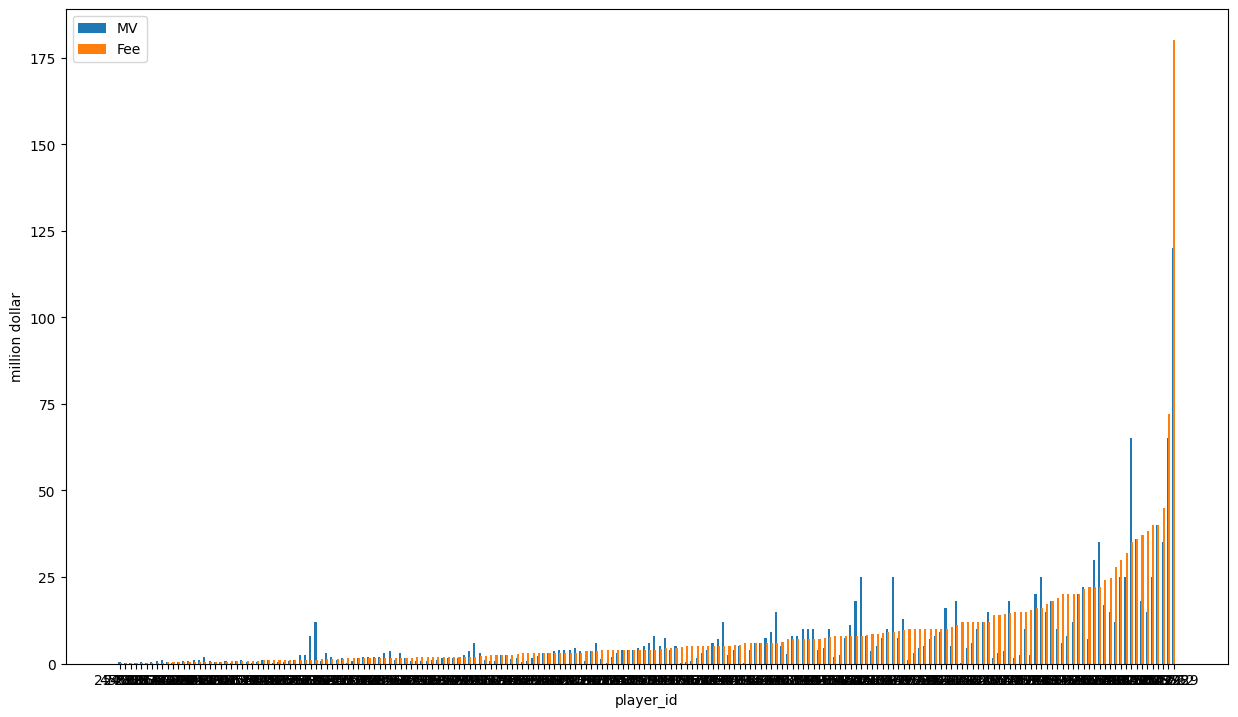

In [23]:
X_axis = np.arange(len(df18['player_id']))
plt.figure(figsize = (15,8.5))
plt.bar(X_axis - 0.1, df18['MV']/1000000, 0.4, label = 'MV')
plt.bar(X_axis + 0.1, df18['Fee']/1000000, 0.4, label = 'Fee')
plt.xticks(X_axis, df18['player_id'])
plt.xlabel("player_id")
plt.ylabel("million dollar")
plt.legend()

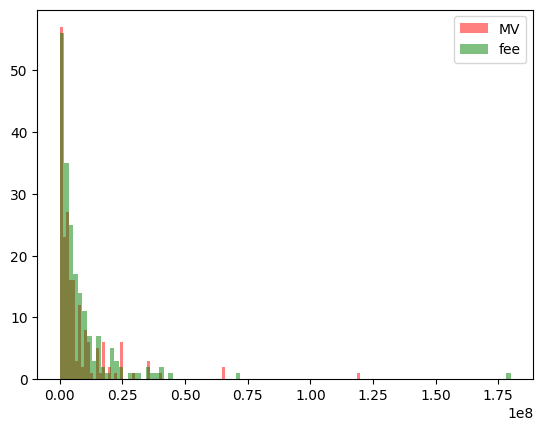

In [17]:
bins = np.linspace(-100, 100, 1000)
plt.hist(df18['MV'],bins=100, alpha=0.5, label='MV', color='r')
plt.hist(df18['Fee'], bins=100, alpha=0.5, label='fee', color='g')
plt.legend(loc='upper right')
plt.show()